In [18]:
#Importation des différentes librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
df = pd.read_csv('data_scaled.csv', index_col=0)

In [6]:
# Création d'un nouveau dataframe pour le clustering
prediction = 'high_blood_pressure'
df_cluster = df.drop([prediction], axis=1) #on enlève la variable de prédiction avant de faire le clustering
df_cluster

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_3,income_4,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9217,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9241,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9244,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# PCA

In [7]:
# Entraînement du PCA
pca = PCA(n_components=6)
pca.fit(df_cluster)

PCA(n_components=6)

Text(0.5, 1.0, 'Variance expliquée')

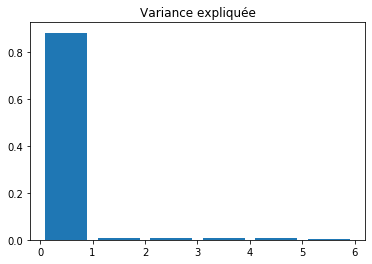

In [9]:
# Visualisation quelle part de variance est expliquée par les composantes principales
plt.bar(np.arange(len(pca.explained_variance_ratio_)) + 0.5,
        pca.explained_variance_ratio_)
plt.title("Variance expliquée")

# K-means

In [10]:
#Test pour savoir quel nombre de clusters est le plus optimal 

nb_clusters = 10 #nombre maximal de clusters qu'on veut tester

for k in range(2, nb_clusters+1):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster) #kmeans avec k clusters    
    #puis on détermine le coefficient de silhouette associé, qui mesure la pertinence du clustering
    #plus le coefficient de silhouette est proche de 1, plus le nombre de cluster est pertinent
    coef_sil = metrics.silhouette_score(df_cluster, kmeans.labels_, metric='euclidean') 
    print("Nombre de clusters: {}".format(k))
    print('Coefficient de silhouette:', coef_sil)
    print("-"*100)

Nombre de clusters: 2
Coefficient de silhouette: 0.5101511872332782
----------------------------------------------------------------------------------------------------
Nombre de clusters: 3
Coefficient de silhouette: 0.3842071052402348
----------------------------------------------------------------------------------------------------
Nombre de clusters: 4
Coefficient de silhouette: 0.3272566067053886
----------------------------------------------------------------------------------------------------
Nombre de clusters: 5
Coefficient de silhouette: 0.27134155828331896
----------------------------------------------------------------------------------------------------
Nombre de clusters: 6
Coefficient de silhouette: 0.22639084824566919
----------------------------------------------------------------------------------------------------
Nombre de clusters: 7
Coefficient de silhouette: 0.19299058588633525
------------------------------------------------------------------------------------

In [12]:
# On définit nos clusters
n_clusters = 3
clustering = KMeans(n_clusters=n_clusters)
clustering.fit(df_cluster) #on applique un kmeans avec 3 clusters

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster)

df_cluster['cluster']=pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu
df_cluster[prediction] = df[[prediction]] #on remet la variable de prédiction dans le df

In [13]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster =[]
for i in range (n_clusters):
     list_cluster.append(df_cluster[df_cluster['cluster'] == i])

In [14]:
list_cluster[0]

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15,cluster,high_blood_pressure
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
9201,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9217,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
list_cluster[1]

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15,cluster,high_blood_pressure
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
52,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
60,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
79,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9133,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
list_cluster[2]

,asthma,anemia,overweight,blood_transfusion,arthritis,congestive_heart_failure,coronary_heart_failure,angina,heart_attack,stroke,...,income_5,income_6,income_8,income_10,income_12,income_13,income_14,income_15,cluster,high_blood_pressure
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
67,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
94,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,1
103,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9184,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
9186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
9190,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
9241,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,1


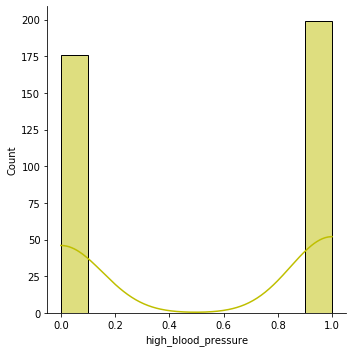

In [19]:
#on regarde la distribution de la variable d'intérêt dans chaque cluster pour voir si cela diffère ou non
sns.displot(list_cluster[0][prediction], color='y', kde=True)

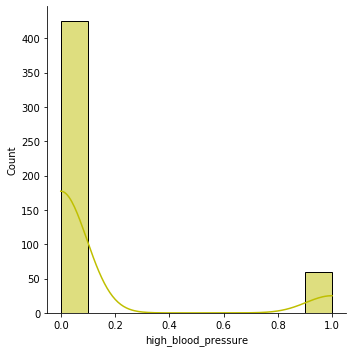

In [20]:
#on regarde la distribution de la variable d'intérêt dans chaque cluster pour voir si cela diffère ou non
sns.displot(list_cluster[1][prediction], color='y', kde=True)

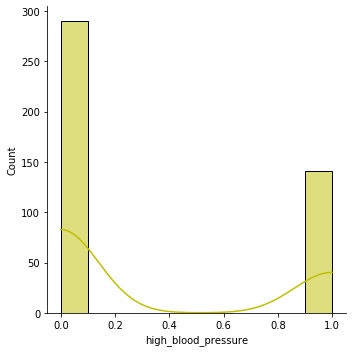

In [21]:
#on regarde la distribution de la variable d'intérêt dans chaque cluster pour voir si cela diffère ou non
sns.displot(list_cluster[2][prediction], color='y', kde=True)